In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('water.csv')

In [12]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
data.shape

(3276, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

water with more pH is more harder and alkaline and vice versa

### Dealing with the null value

In [32]:
data['ph'].fillna((data['ph'].mean()),inplace=True)
data['Sulfate'].fillna((data['Sulfate'].mean()),inplace=True)
data['Trihalomethanes'].fillna((data['Trihalomethanes'].mean()),inplace=True)

In [33]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


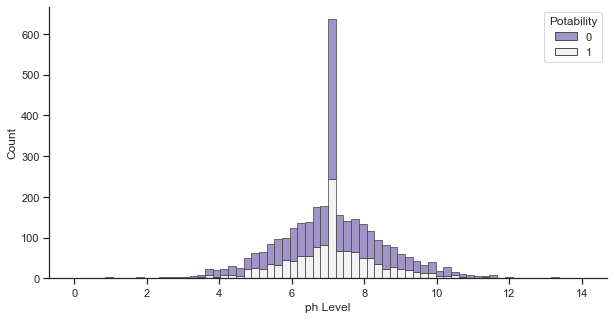

In [35]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)

sns.histplot(data,x="ph", hue="Potability",multiple="stack",palette="light:m_r",edgecolor=".3")

plt.xlabel('ph Level');

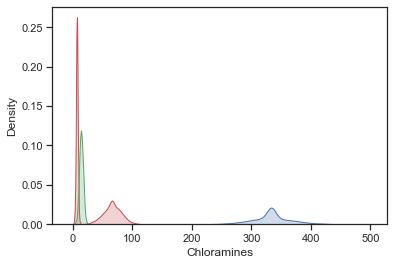

In [38]:
fig = sns.kdeplot(data['Chloramines'], shade=True, color="r")
fig = sns.kdeplot(data['Sulfate'], shade=True, color="b")
fig = sns.kdeplot(data['Organic_carbon'], shade=True, color="g")
fig = sns.kdeplot(data['Trihalomethanes'], shade=True, color="r")
plt.show()

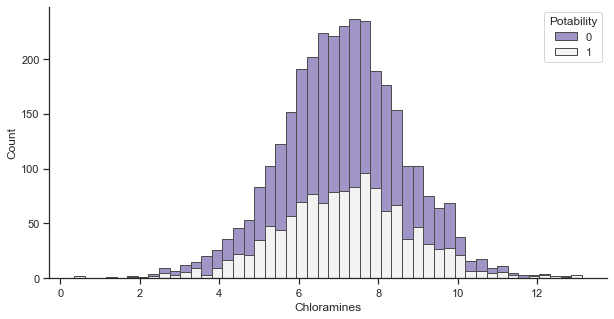

In [40]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)

sns.histplot(data,x="Chloramines", hue="Potability",multiple="stack",palette="light:m_r",edgecolor=".3");

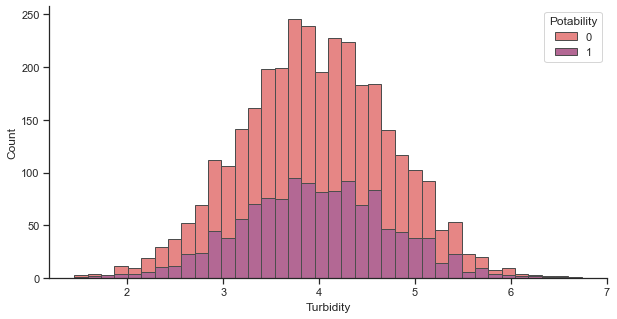

In [42]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)

sns.histplot(data,x="Turbidity", hue="Potability",multiple="stack",palette="flare",edgecolor=".3");

In [43]:
def f(x):
    if x<17.1:
        x="Soft"
    elif 17.1<x<60:
        x="Slightly hard"
    elif 60 <x <120:
        x="Moderately hard"
    elif 120 <x <180:
        x="Hard"
    elif x > 180:
        x="very hard"
    return x

In [46]:
data['Hard'] = data['Hardness'].apply(f)

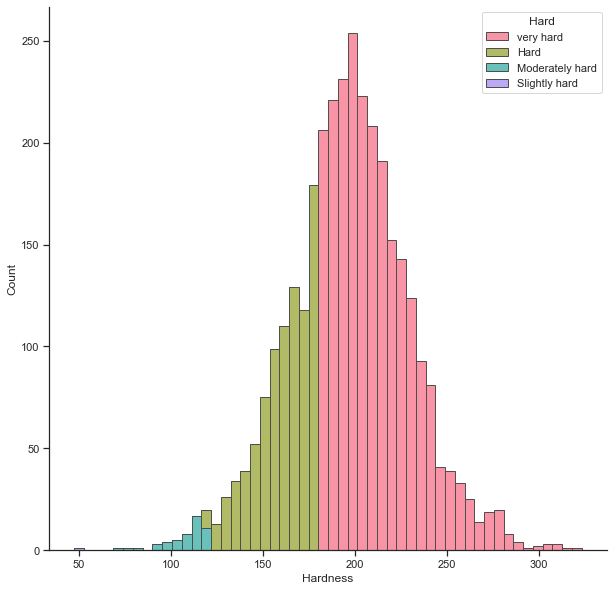

In [48]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,10))
sns.despine(f)

sns.histplot(data,x="Hardness", hue="Hard",multiple="stack",palette="husl",edgecolor=".3");

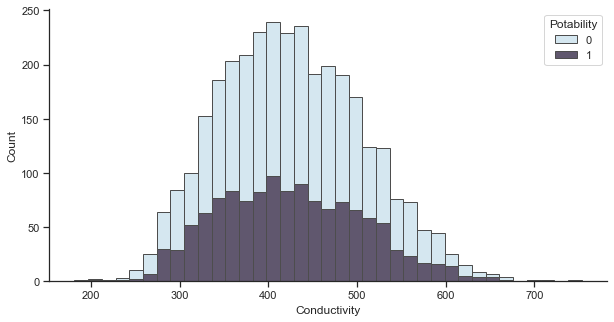

In [50]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)

sns.histplot(data,x="Conductivity", hue="Potability",multiple="stack",palette="ch:s=.25,rot=-.25",edgecolor=".3");

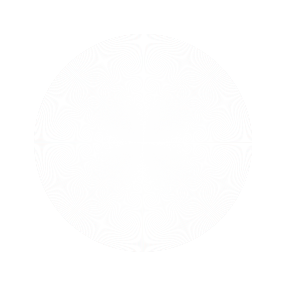

In [53]:
plt.figure(figsize=(10,5))
y = data['Potability']

plt.pie(y)
plt.show()

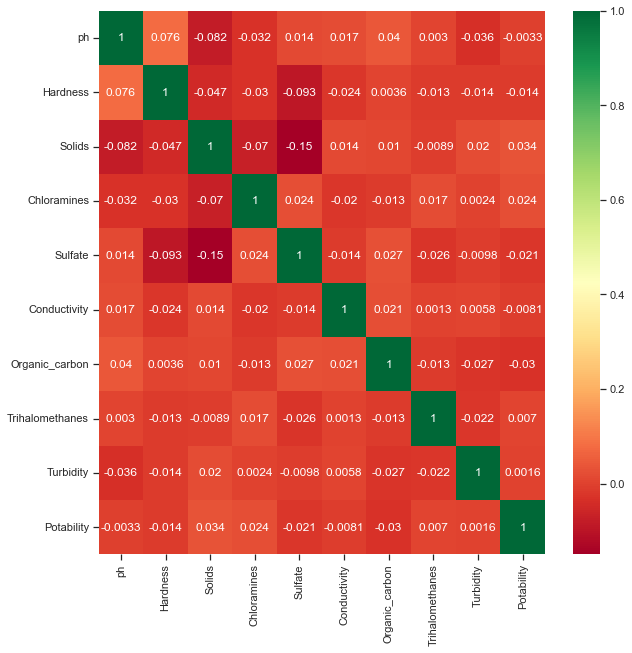

In [54]:
df=data.corr()
features=df.index
plt.figure(figsize=(10,10))

#Plotting heatmap with Seaborn

s=sns.heatmap(data[features].corr(),annot=True,cmap='RdYlGn')

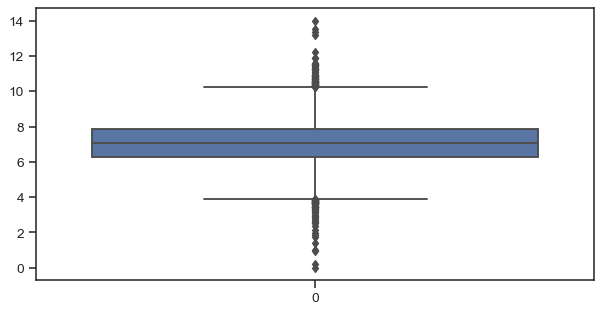

In [61]:
plt.figure(figsize=(8,4),dpi=90)
sns.boxplot(data=data['ph']);

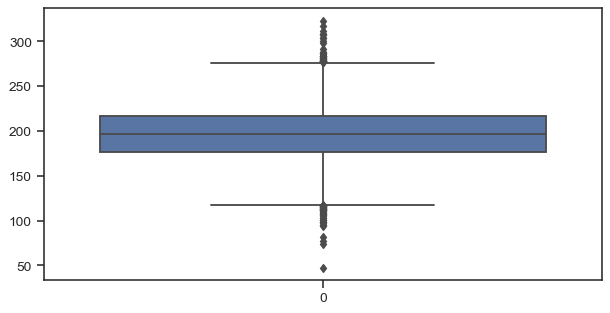

In [62]:
plt.figure(figsize=(8,4),dpi=90)
sns.boxplot(data=data['Hardness']);

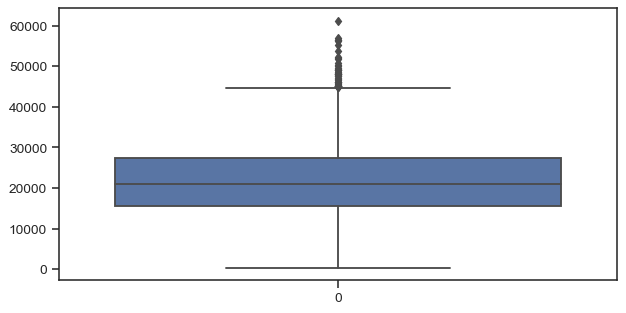

In [63]:
plt.figure(figsize=(8,4),dpi=90)
sns.boxplot(data=data['Solids']);

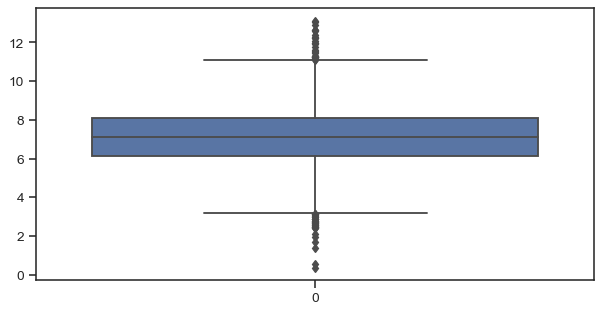

In [64]:
plt.figure(figsize=(8,4),dpi=90)
sns.boxplot(data=data['Chloramines']);

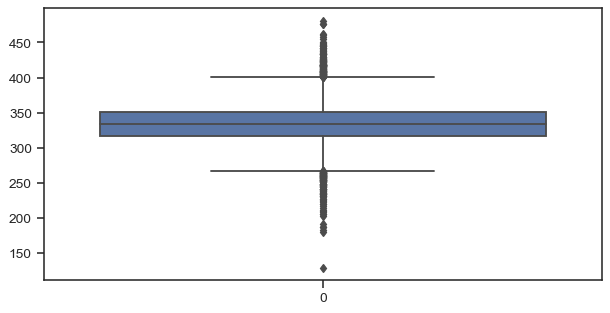

In [65]:
plt.figure(figsize=(8,4),dpi=90)
sns.boxplot(data=data['Sulfate']);

In [66]:
def drop_outliers(data,feature):
    iqr=1.5 * (np.percentile(data[feature],80)-np.percentile(data[feature],10))
    data.drop(data[data[feature]> (iqr+np.percentile(data[feature],80))].index,inplace=True)
    data.drop(data[data[feature]< (np.percentile(data[feature],10)-iqr)].index,inplace=True)

In [67]:
drop_outliers(data,'ph')
drop_outliers(data,'Hardness')
drop_outliers(data,'Solids')
drop_outliers(data,'Chloramines')
drop_outliers(data,'Sulfate')
drop_outliers(data,'Conductivity')
drop_outliers(data,'Organic_carbon')
drop_outliers(data,'Trihalomethanes')
drop_outliers(data,'Turbidity')

In [68]:
data.shape

(3251, 11)